In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
# Read in the raw data sets to plot

datasetPrefix = "phase-z-to-split-splitPositions"
df = getCountDFbyPrefix(datasetPrefix, datasetFolder='../data/211022-25-E13-Cas9-bud-LV-188-401-402-phase-contrast/')


In [3]:
# Annotate the data set
#
# sg-Control: LV-188
# sg1-Itgb1: LV-401
# sg2-Itgb1: LV-402

# groups = ["1"]*10 + ["2"]*10 + ["3"]*10 + \
#          ["4"]*10 + ["5"]*10 + ["6"]*10 + \
#          ["7"]*9 + ["8"]*9 + ["9"]*9
# df["groups"] = groups

sgRNA = ["sg-Control"]*30 + ["sg1-Itgb1"]*30 + ["sg2-Itgb1"]*27
df["sgRNA"] = sgRNA

treatment = (["NA"]*7 + ["blasticidin"]*3)*3 + \
            (["NA"]*7 + ["blasticidin"]*3)*3 + \
            (["NA"]*6 + ["blasticidin"]*3)*3
df["treatment"] = treatment

time_h = ["23"]*10 + ["43"]*10 + ["71"]*10 + \
         ["23"]*10 + ["43"]*10 + ["71"]*10 + \
         ["23"]*9 + ["43"]*9 + ["71"]*9
df["time_h"] = time_h

# change time_h to integer
df = df.astype({'time_h': 'int64'})

sample_id = list(range(1,11))*3 + list(range(11,21))*3 + list(range(21,30))*3
df["sample_id"] = sample_id

groups = [sgRNA[i]+'_'+time_h[i]+'_'+treatment[i] for i in range(len(sgRNA))]
df["groups"] = groups

sg_treatment = [sgRNA[i]+'_'+treatment[i] for i in range(len(sgRNA))]
df["sg_treatment"] = sg_treatment

# # Inspect raw data if curious about how they look
# sns.swarmplot(df.groups, df.counts)

# # Perform a Tukey test across groups
# tukeyTest(df.counts, df.groups)

In [4]:
df_NA = df[df.treatment=='NA']
df_blast = df[df.treatment=='blasticidin']

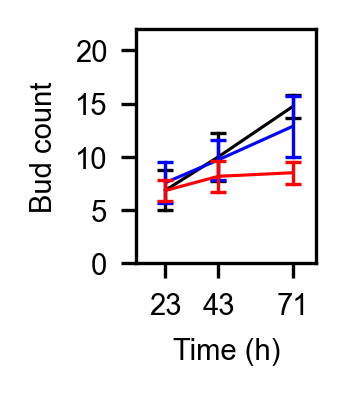

In [5]:
# Make plot for figure

fig_width, fig_height = 1.0, 1.2 # inches
line_width = .8
output_prefix = '211022-25-E13-Cas9-bud-no-blast'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.35, 0.3, 0.6, 0.65])

palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.lineplot(data = df_NA,
             x = 'time_h', y = 'counts', hue = 'sgRNA',
             size = line_width+.2,
             palette = palette_dict,
             ci = 'sd',
             err_style = "bars",
             err_kws = {'capsize': 2,
                        'elinewidth': line_width,
                        'capthick': line_width}
            )

y_max = 22
plt.ylim([0,y_max])
plt.yticks(np.arange(0,y_max,5))

plt.xlim([12,80])
plt.xticks([23,43,71])

plt.xlabel("Time (h)")
plt.ylabel("Bud count")

ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

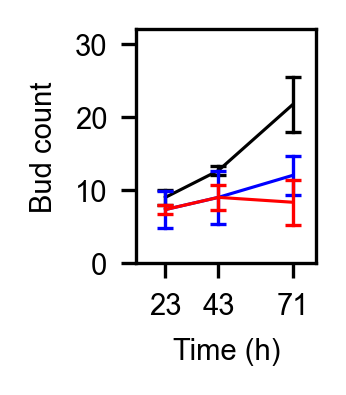

In [6]:
# Make plot for figure

fig_width, fig_height = 1.0, 1.2 # inches
line_width = .8
output_prefix = '211022-25-E13-Cas9-bud-with-blast'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.35, 0.3, 0.6, 0.65])

palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.lineplot(data = df_blast,
             x = 'time_h', y = 'counts', hue = 'sgRNA',
             size = line_width+.2,
             palette = palette_dict,
#              err_style = 'band',
             ci = 'sd',
             err_style = "bars",
             err_kws = {'capsize': 2,
                        'elinewidth': line_width,
                        'capthick': line_width}
            )

y_max = 32
plt.ylim([0,y_max])
plt.yticks(np.arange(0,y_max,10))

plt.xlim([12,80])
plt.xticks([23,43,71])

plt.xlabel("Time (h)")
plt.ylabel("Bud count")

ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

In [7]:
# Calculate the bud ratios

df.head()

,file_name,scrambled_file_name,counts,sgRNA,treatment,time_h,sample_id,groups,sg_treatment
0,LV-188-D02-D11-23h-z-Ph-00.tif,4ea9ca61f133ff2eeb6d4a95be8e8725.tif,7,sg-Control,NA,23,1,sg-Control_23_NA,sg-Control_NA
1,LV-188-D02-D11-23h-z-Ph-01.tif,d19cf2132198299b70047b211c6559a5.tif,4,sg-Control,NA,23,2,sg-Control_23_NA,sg-Control_NA
2,LV-188-D02-D11-23h-z-Ph-02.tif,7de296dfa4ae0b494225773bce4a55f8.tif,6,sg-Control,NA,23,3,sg-Control_23_NA,sg-Control_NA
3,LV-188-D02-D11-23h-z-Ph-03.tif,4e9c3e22a59c02d7e7fbc7b5e8b37991.tif,7,sg-Control,NA,23,4,sg-Control_23_NA,sg-Control_NA
4,LV-188-D02-D11-23h-z-Ph-04.tif,3225048ff43f29e2defce0a771e5ef8f.tif,8,sg-Control,NA,23,5,sg-Control_23_NA,sg-Control_NA


In [8]:
df_23h = df[df.time_h==23]
df_23h.reset_index(inplace=True)

df_43h = df[df.time_h==43]
df_43h.reset_index(inplace=True)

df_71h = df[df.time_h==71]
df_71h.reset_index(inplace=True)

In [9]:
ratios = df_43h.counts / df_23h.counts
df_71h['ratios_d2_to_d1'] = ratios

ratios = df_71h.counts / df_43h.counts
df_71h['ratios_d3_to_d2'] = ratios

ratios = df_71h.counts / df_23h.counts
df_71h['ratios_d3_to_d1'] = ratios

In [10]:
df_71h_NA = df_71h[df_71h.treatment=='NA']

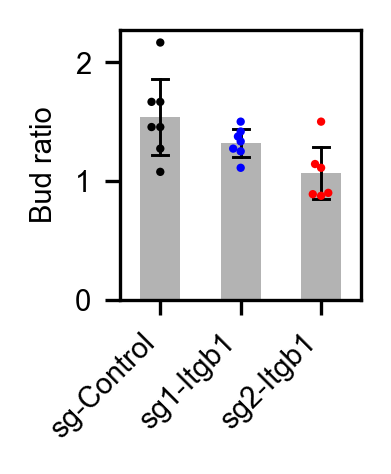

In [11]:
# Make plot for figure

fig_width, fig_height = 1.2, 1.5 # inches
line_width = .8
output_prefix = '211022-25-E13-Cas9-bud-ratios-d3-d2-no-blast'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.28, 0.35, 0.67, 0.6])

palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.swarmplot(data = df_71h_NA,
              x = 'sgRNA', y = 'ratios_d3_to_d2', hue = 'sgRNA',
              size = 2,
              palette = palette_dict,
             )
sns.barplot(data = df_71h_NA,
            x = 'sgRNA', y = 'ratios_d3_to_d2',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

change_bar_width(ax, .5)

plt.xlabel("")
plt.ylabel("Bud ratio")

ax.get_legend().remove()

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

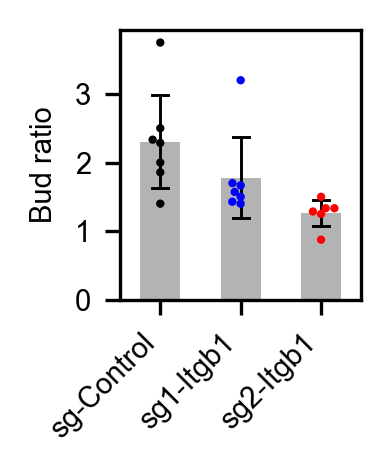

In [12]:
# Make plot for figure

fig_width, fig_height = 1.2, 1.5 # inches
line_width = .8
output_prefix = '211022-25-E13-Cas9-bud-ratios-d3-d1-no-blast'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.28, 0.35, 0.67, 0.6])

palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.swarmplot(data = df_71h_NA,
              x = 'sgRNA', y = 'ratios_d3_to_d1', hue = 'sgRNA',
              size = 2,
              palette = palette_dict,
             )
sns.barplot(data = df_71h_NA,
            x = 'sgRNA', y = 'ratios_d3_to_d1',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

change_bar_width(ax, .5)

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("Bud ratio")

ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

In [13]:
tukeyTest(df_71h_NA.ratios_d3_to_d1, df_71h_NA.sgRNA)


Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
sg-Control sg1-Itgb1  -0.5228 0.2478 -1.3292  0.2836  False
sg-Control sg2-Itgb1  -1.0408 0.0143 -1.8802 -0.2015   True
 sg1-Itgb1 sg2-Itgb1  -0.5181 0.2798 -1.3574  0.3213  False
-----------------------------------------------------------
p values of all pair-wise tests:
 [0.24784029 0.01432459 0.27979362]


In [14]:
tukeyTest(df_NA.counts, df_NA.groups)


Summary of test:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
sg-Control_23_NA sg-Control_43_NA   3.1429 0.0542   -0.031  6.3167  False
sg-Control_23_NA sg-Control_71_NA   7.8571  0.001   4.6833  11.031   True
sg-Control_23_NA  sg1-Itgb1_23_NA   0.7143    0.9  -2.4596  3.8881  False
sg-Control_23_NA  sg1-Itgb1_43_NA   2.8571 0.1092  -0.3167   6.031  False
sg-Control_23_NA  sg1-Itgb1_71_NA      6.0  0.001   2.8262  9.1738   True
sg-Control_23_NA  sg2-Itgb1_23_NA  -0.0238    0.9  -3.3272  3.2796  False
sg-Control_23_NA  sg2-Itgb1_43_NA   1.3095    0.9  -1.9939   4.613  False
sg-Control_23_NA  sg2-Itgb1_71_NA   1.6429 0.7696  -1.6606  4.9463  False
sg-Control_43_NA sg-Control_71_NA   4.7143  0.001   1.5404  7.8881   True
sg-Control_43_NA  sg1-Itgb1_23_NA  -2.4286 0.2668  -5.6024  0.7453  False
sg-Control_43_NA  sg

In [15]:
tukeyTest(df_blast.counts, df_blast.groups)

Summary of test:
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                    group2          meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------------
sg-Control_23_blasticidin sg-Control_43_blasticidin   3.6667 0.6505  -3.3841 10.7175  False
sg-Control_23_blasticidin sg-Control_71_blasticidin  12.6667  0.001   5.6159 19.7175   True
sg-Control_23_blasticidin  sg1-Itgb1_23_blasticidin  -1.6667    0.9  -8.7175  5.3841  False
sg-Control_23_blasticidin  sg1-Itgb1_43_blasticidin      0.0    0.9  -7.0508  7.0508  False
sg-Control_23_blasticidin  sg1-Itgb1_71_blasticidin      3.0 0.8276  -4.0508 10.0508  False
sg-Control_23_blasticidin  sg2-Itgb1_23_blasticidin  -1.6667    0.9  -8.7175  5.3841  False
sg-Control_23_blasticidin  sg2-Itgb1_43_blasticidin      0.0    0.9  -7.0508  7.0508  False
sg-Control_23_blasticidin  sg2-Itgb1_71_blasticidin  -0.6667  